In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

In [2]:
df = pd.read_csv('mhealth_raw_data.csv')
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [3]:
df.drop('subject', axis=1, inplace=True)

In [4]:
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0


In [5]:
x = df.iloc[:, :-1]
x.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862


In [6]:
y = df.iloc[:, -1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Activity, dtype: int64

In [7]:
print(x.shape)
print(y.shape)

(1215745, 12)
(1215745,)


In [8]:
x_train, _, y_train, _ = train_test_split(x, y, train_size=30000, stratify=y, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [9]:
x_train

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
928236,0.63176,-9.7185,1.416200,-0.589980,-0.74859,-0.194500,-5.22820,-1.1102,7.97570,-0.837250,-0.33470,0.22629
896780,2.22450,-16.2000,-12.121000,0.545450,-0.80113,-0.306480,19.39200,-15.4360,-2.59470,-0.705880,-0.38398,0.78879
695722,1.77810,-10.0860,-2.684400,-0.016698,-0.79737,-0.713160,2.86120,-2.1698,6.01650,-0.325490,-0.67351,0.86638
848853,2.14370,-9.5971,0.687420,-0.467530,-0.81426,0.341850,-3.49090,-8.6708,2.92060,-0.903920,-0.43326,0.29310
6146,1.98210,-9.4656,-0.026376,-0.243040,-0.88555,-0.510810,-3.44330,-8.1949,1.50690,-0.015686,-0.93018,-0.39009
...,...,...,...,...,...,...,...,...,...,...,...,...
411397,0.31369,-10.2320,-3.352200,0.415580,-1.44470,-0.047151,0.37156,-12.0100,2.95160,-0.107840,-0.94661,0.96121
532601,1.92630,-9.5402,0.438090,0.760670,-0.63977,-0.147350,-2.82370,-9.1316,-0.16492,0.315690,-1.02670,0.50862
66798,2.50370,-9.6045,-0.048935,0.209650,-0.70544,0.579570,-8.83580,3.0816,-1.83550,-0.641180,0.87064,0.29310
471994,1.25830,-11.1440,0.403280,0.482370,-0.74296,0.312380,-1.06490,-9.0615,2.84900,-0.186270,-0.71869,0.83405


In [10]:
y_train

928236    0
896780    0
695722    0
848853    0
6146      0
         ..
411397    5
532601    0
66798     0
471994    4
615068    0
Name: Activity, Length: 24000, dtype: int64

In [11]:
x_test

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
785758,0.83993,-9.7744,1.76970,0.298700,-0.61163,0.62672,-1.58010,-9.2325,2.74670,-0.070588,-0.64066,0.965520
1180943,1.05840,-9.3211,-0.42422,-0.361780,-0.84053,-0.56189,-1.56290,-6.0821,1.78960,-0.068627,-0.99384,-0.506470
102958,-2.90080,-5.9138,-7.22050,-0.322820,-0.97561,-0.15521,-4.50990,7.4385,5.85110,-0.658820,0.87885,0.012931
1133415,16.17100,-19.2090,-3.09040,-0.283860,-0.11820,-1.06290,-5.24070,-15.8640,0.64432,0.111760,-0.90144,-0.581900
277937,-0.39799,-9.7786,-1.61790,-0.482370,-0.82739,-0.34185,1.18220,-7.1469,6.30930,-0.356860,-1.16840,0.504310
...,...,...,...,...,...,...,...,...,...,...,...,...
601389,1.26640,-9.8168,0.50099,0.677180,-0.70732,-0.15521,-3.48050,-9.4151,-0.51242,0.088235,-0.92402,0.691810
654643,1.17230,-9.5388,1.56600,0.029685,-0.85553,-0.59921,-3.17090,-8.9731,1.68680,0.192160,-1.06370,-0.241380
26362,2.99470,-9.3535,-0.69815,0.528760,-0.65854,0.42829,0.53336,8.7298,5.97820,0.180390,0.41478,1.036600
375039,-2.26570,-3.5886,3.51670,-0.601110,-0.12195,-0.96267,0.66893,-15.3420,0.81624,0.117650,-1.03080,-0.422410


In [12]:
y_test

785758     1
1180943    0
102958     0
1133415    0
277937     0
          ..
601389     0
654643     1
26362      0
375039     0
362477     0
Name: Activity, Length: 6000, dtype: int64

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 12)
(6000, 12)
(24000,)
(6000,)


# KNN

In [14]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13]}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best parameters: ", grid_search.best_params_)
y_pred_knn = grid_search.predict(x_test)

print("Accuracy score: ", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision score: ", metrics.precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall score: ", metrics.recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 score: ", metrics.f1_score(y_test, y_pred_knn, average='weighted'))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred_knn))

Best parameters:  {'n_neighbors': 9}
Accuracy score:  0.7881666666666667
Precision score:  0.7720950016162078
Recall score:  0.7881666666666667
F1 score:  0.7718426466558449
Confusion matrix: 
 [[3841   65   76   42   27   19   43   38   51   44   36   18    6]
 [  24  127    0    0    0    0    0    0    0    0    0    0    0]
 [   7    0  144    0    0    0    0    0    0    0    0    0    0]
 [   6    0    0  146    0    0    0    0    0    0    0    0    0]
 [ 118    0    0    0   30    1    1    1    1    0    0    0    0]
 [ 111    0    2    0    3   31    0    0    5    0    0    0    0]
 [  65    3    0    0    0    0   72    0    0    0    0    0    0]
 [  59    0    0    0    0    0    0   86    0    0    0    0    0]
 [  86    0    0    0    0    2    0    0   57    0    0    0    0]
 [  85    0    0    0    0    0    0    2    0   64    0    0    0]
 [  74    0    0    0    1    0    0    1    0    0   68    8    0]
 [  64    0    0    0    0    0    0    0    0    0   29  

In [15]:
classification_report(y_test,y_pred_knn)

'              precision    recall  f1-score   support\n\n           0       0.84      0.89      0.86      4306\n           1       0.65      0.84      0.73       151\n           2       0.65      0.95      0.77       151\n           3       0.78      0.96      0.86       152\n           4       0.49      0.20      0.28       152\n           5       0.58      0.20      0.30       152\n           6       0.62      0.51      0.56       140\n           7       0.67      0.59      0.63       145\n           8       0.50      0.39      0.44       145\n           9       0.59      0.42      0.49       151\n          10       0.50      0.45      0.47       152\n          11       0.66      0.39      0.49       152\n          12       0.40      0.08      0.13        51\n\n    accuracy                           0.79      6000\n   macro avg       0.61      0.53      0.54      6000\nweighted avg       0.77      0.79      0.77      6000\n'

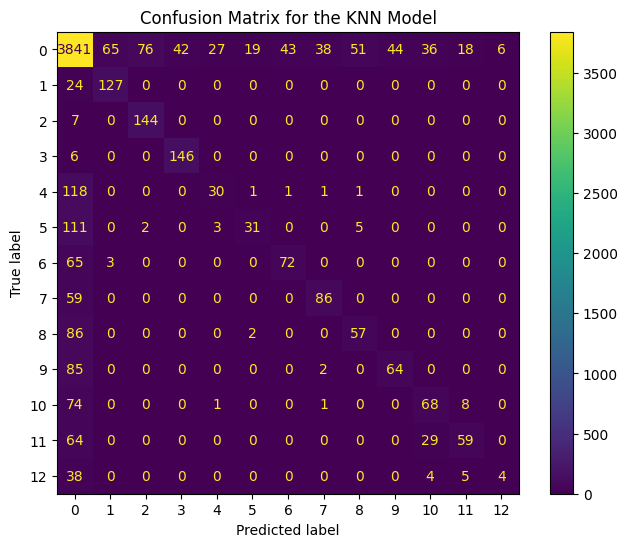

In [16]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
display = ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred_knn), display_labels=grid_search.classes_)
ax.set(title='Confusion Matrix for the KNN Model')
display.plot(ax=ax)
plt.show()

# SVM

In [17]:
param_grid = {'C': [0.5, 10], 'degree': [2, 7], 'kernel': ['rbf']}
clf = SVC()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters: ", grid_search.best_params_)
y_pred_svm = grid_search.predict(x_test)

print("Accuracy score: ", metrics.accuracy_score(y_test, y_pred_svm))
print("Precision score: ", metrics.precision_score(y_test, y_pred_svm, average='weighted'))
print("Recall score: ", metrics.recall_score(y_test, y_pred_svm, average='weighted'))
print("F1 score: ", metrics.f1_score(y_test, y_pred_svm, average='weighted'))
conf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)
print("Confusion matrix: \n", conf_matrix)

Best parameters:  {'C': 10, 'degree': 2, 'kernel': 'rbf'}
Accuracy score:  0.7678333333333334
Precision score:  0.6842276084778363
Recall score:  0.7678333333333334
F1 score:  0.7117813879426043
Confusion matrix: 
 [[4063    0   30   68    0    0    1   13   11   45   37   34    4]
 [ 151    0    0    0    0    0    0    0    0    0    0    0    0]
 [  88    0   63    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0  152    0    0    0    0    0    0    0    0    0]
 [ 152    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 152    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 140    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 101    0    0    0    0    0    0   44    0    0    0    0    0]
 [ 119    0    0    0    0    0    0    0   26    0    0    0    0]
 [  83    0    0    0    0    0    0    0    0   68    0    0    0]
 [  57    0    0    0    0    0    0    1    0    0   84    9    1]
 [  40    0    0    0    0    0    0 

c:\Users\MaDo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


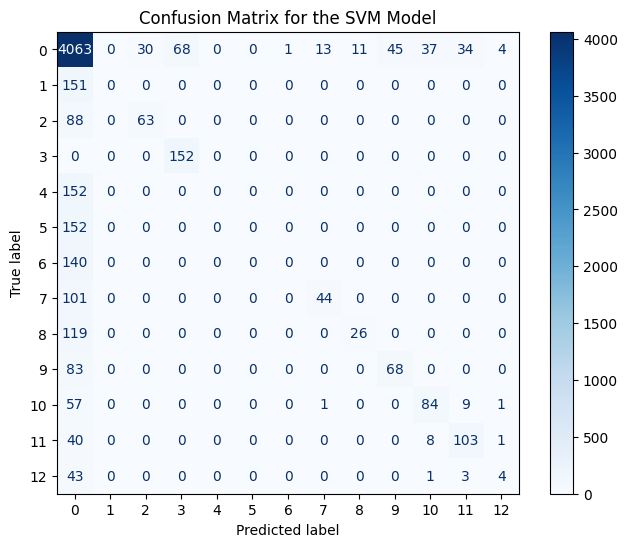

In [18]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
display_labels = grid_search.classes_
display = ConfusionMatrixDisplay(conf_matrix, display_labels=display_labels)
display.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix for the SVM Model')
plt.show()

# Logistic Regression

In [19]:
lm = LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(x_train, y_train)
accuracy = lm.score(x_test, y_test)
y_pred_lm=lm.predict(x_test)
print(accuracy)

0.7263333333333334


In [20]:
conf_matrixx=confusion_matrix(y_test, y_pred_lm)
conf_matrixx

array([[4222,    0,    0,   53,    0,    0,    4,    3,    0,   14,    4,
           6,    0],
       [ 151,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [ 151,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [  44,    0,    0,  108,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [ 152,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [ 151,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [ 140,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [ 145,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [ 145,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [ 142,    0,    0,    0,    0,    0,    0,    0,    0,    9,    0,
           0,    0],
       [ 149,    0,    0,    0,    0,    0,    0, 

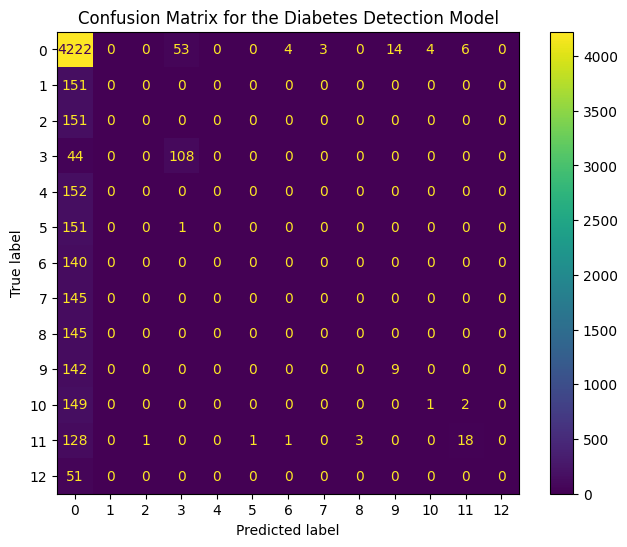

In [21]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
display = ConfusionMatrixDisplay(conf_matrixx, display_labels=lm.classes_)
ax.set(title='Confusion Matrix for the Diabetes Detection Model')
display.plot(ax=ax)

# Neural Network

In [22]:
nn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(12,)),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=13, activation="softmax"),
])
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
nn.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=optim)
nn.summary()
history = nn.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 13)             │         1,677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,989 (58.55 KB)

 Trainable params: 14,989 (58.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7047 - loss: 1.1121 - val_accuracy: 0.7462 - val_loss: 0.7552
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7483 - loss: 0.7394 - val_accuracy: 0.7482 - val_loss: 0.6842
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7584 - loss: 0.6758 - val_accuracy: 0.7640 - val_loss: 0.6415
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - accuracy: 0.7713 - loss: 0.6181 - val_accuracy: 0.7712 - val_loss: 0.5937
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7822 - loss: 0.5803 - val_accuracy: 0.7713 - val_loss: 0.5802
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7853 - loss: 0.5588 - val_accuracy: 0.7867 - val_loss: 0.5584
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7940 - loss: 0.5337 - val_accuracy: 0.7842 - val_loss: 0.5444
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8085 - loss: 0.4959 - val_ac

In [23]:
y_pred = np.argmax(nn.predict(x_test), axis=-1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Confusion Matrix: \n{confusion}')

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step
Accuracy: 0.8238333333333333
Precision: 0.8238422630810265
Recall: 0.8238333333333333
F1-score: 0.8219333826743603
Confusion Matrix: 
[[3775   62   71   49   46   57   47   40   28   50   36   28   17]
 [  26  125    0    0    0    0    0    0    0    0    0    0    0]
 [  10    0  141    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0  152    0    0    0    0    0    0    0    0    0]
 [  56    0    0    0   95    1    0    0    0    0    0    0    0]
 [  71    0    0    0    5   72    0    0    4    0    0    0    0]
 [  48    0    0    0    0    0   92    0    0    0    0    0    0]
 [  35    0    0    0    0    0    0  110    0    0    0    0    0]
 [  77    0    0    0    0    1    0    0   67    0    0    0    0]
 [  51    0    0    0    0    1    0    0    0   99    0    0    0]
 [  41    0    0    0    0    0    0    0    0    0   94   13    4]
 [  36    0    0    0    0    1    0    0    0    0    5  107    3]
 [  34 

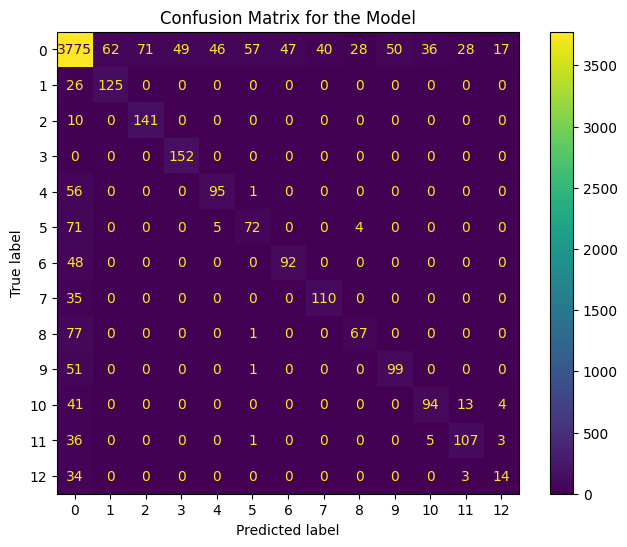

In [24]:
class_labels = np.unique(np.concatenate((y_test, y_pred)))
fig, ax = plt.subplots(figsize=(8,6), dpi=100)
display = ConfusionMatrixDisplay(confusion, display_labels=class_labels)
display.plot(ax=ax)
ax.set(title='Confusion Matrix for the Model')
plt.show()

# Linear Regression

In [25]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred_lr)
print('Mean squared error = ' , mse)
rmse = np.sqrt(mse)
print('Root mean squared error = ', rmse)

Mean squared error =  10.282271548195098
Root mean squared error =  3.2065981270179615
